In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from scipy import sparse
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


# Ön işlenmiş verileri oku
df = pd.read_csv('./preprocessed_data/lemmatized_and_misspelled_removed_SEFACED.csv', encoding='utf-8')

# Kök alınmış kelimeleri çıkar
corpus = df['lemmatized_tokens']

# Bir TfidfVectorizer oluştur
vectorizer = TfidfVectorizer()

# Kök alınmış kelimeleri dönüştür
X_tfidf = vectorizer.fit_transform(corpus)

# Seyrek matrisi bir DataFrame'e dönüştür
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Ek özellikleri içeren CSV dosyasını yükle
df_features = pd.read_csv('./data_with_extra_features/SEFACED_all_f eatures.csv')

# İstenilen sütunları df_features'dan çıkar
desired_columns = ['html_tag_count', 'css_tag_count', 'spam_phrase_count', 'link_count', 'grammar_error_count', 'misspelled_word_count']
df_desired_features = df_features[desired_columns]

# df_tfidf'yi istenilen özelliklerle birleştir
df_tfidf_merged = pd.concat([df_tfidf, df_desired_features], axis=1)

print(df_tfidf_merged)


        aa  aba  abandon  abandoned  abandonment  abased  abatement  abb  \
0      0.0  0.0      0.0        0.0          0.0     0.0        0.0  0.0   
1      0.0  0.0      0.0        0.0          0.0     0.0        0.0  0.0   
2      0.0  0.0      0.0        0.0          0.0     0.0        0.0  0.0   
3      0.0  0.0      0.0        0.0          0.0     0.0        0.0  0.0   
4      0.0  0.0      0.0        0.0          0.0     0.0        0.0  0.0   
...    ...  ...      ...        ...          ...     ...        ...  ...   
17110  0.0  0.0      0.0        0.0          0.0     0.0        0.0  0.0   
17111  0.0  0.0      0.0        0.0          0.0     0.0        0.0  0.0   
17112  0.0  0.0      0.0        0.0          0.0     0.0        0.0  0.0   
17113  0.0  0.0      0.0        0.0          0.0     0.0        0.0  0.0   
17114  0.0  0.0      0.0        0.0          0.0     0.0        0.0  0.0   

       abbas  abbey  ...  zone  zoning  zoo  zoom  html_tag_count  \
0        0.0    0.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score



corpus = df['lemmatized_tokens']
y = df['Class_Label']

# Veri kümesini eğitim ve test setlerine ayırın
X_train, X_test, y_train, y_test = train_test_split(df_tfidf_merged, y, test_size=0.2, random_state=42)

In [3]:
df_tfidf_merged.to_csv("with_tfidf.csv", index= False)


(17115, 12857)
(17115, 1)
Normal


C:\Users\orange\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Neural Network Model Summary: 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 10)                128580    
                                                                 
 fc2 (Dense)                 (None, 10)                110       
                                                                 
 output (Dense)              (None, 2)                 22        
                                                                 
Total params: 128,712
Trainable params: 128,712
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200
2739/2739 - 14s - loss: 0.1361 - accuracy: 0.9502 - 14s/epoch - 5ms/step
Epoch 2/200
2739/2739 - 11s - loss: 0.0208 - accuracy: 0.9936 - 11s/epoch - 4ms/step
Epoch 3/200
2739/2739 - 11s - loss: 0.0132 - accuracy: 0.9968 - 11s/epoch - 4ms/step
Epoch 4/200
2739/2739 -

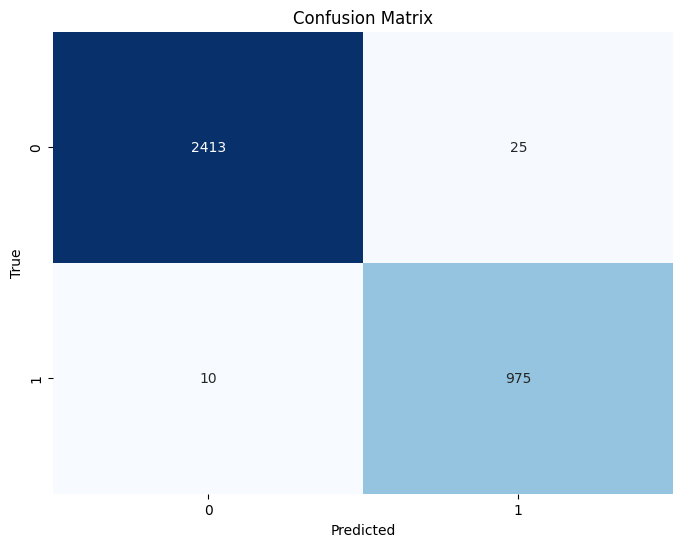

In [5]:
# LSTM

import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

df = pd.read_csv("./with_tfidf.csv")
x = df.values

y_ = pd.read_csv("./with_bow_labels.csv")
print(x.shape)
print(y_.shape)

print(y_["Class_Label"].iloc[2])

y = []
i = 0
while i < 17115 :
        if y_["Class_Label"].iloc[i] == "Normal":
                y.append(0)
        else:
                y.append(1)
        i += 1

y = np.array(y)
y_ = y.reshape(-1, 1)



# One Hot encode the class labels
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)

# Split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20, random_state=42)

# Build the model

model = Sequential()

model.add(Dense(10, input_shape=(12857,), activation='relu', name='fc1'))
model.add(Dense(10, activation='relu', name='fc2'))
model.add(Dense(2, activation='softmax', name='output'))

# Adam optimizer with learning rate of 0.001
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print('Neural Network Model Summary: ')
print(model.summary())

# Train the model
model.fit(train_x, train_y, verbose=2, batch_size=5, epochs=200)

y_pred = model.predict(test_x)

y_pred_classes = np.argmax(y_pred, axis=1)
test_y_classes = np.argmax(test_y, axis=1)

lstm_accuracy = accuracy_score(test_y_classes, y_pred_classes )
lstm_precision = precision_score(test_y_classes, y_pred_classes )
lstm_recall = recall_score(test_y_classes, y_pred_classes )
lstm_f1_score = f1_score(test_y_classes, y_pred_classes )



print(f"Accuracy: {lstm_accuracy}")
print(f"Precision: {lstm_precision}")
print(f"Recall: {lstm_recall}")
print(f"F1-score: {lstm_f1_score}")

# Compute confusion matrix
cm = confusion_matrix(test_y_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

C:\Users\orange\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Neural Network Model Summary: 
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 12855, 64)         256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 6427, 64)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 6425, 32)          6176      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 3212, 32)         0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 102784)            0         
                                                                 
 dense (Dense)         

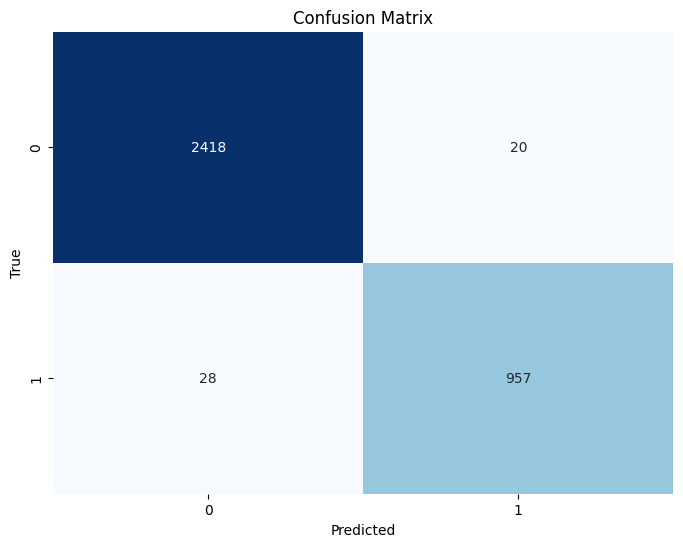

In [6]:
# CNN


import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.optimizers import Adam

df = pd.read_csv("./with_tfidf.csv")
x = df.values

y_ = pd.read_csv("./with_bow_labels.csv")

y = []
for label in y_["Class_Label"]:
    if label == "Normal":
        y.append(0)
    else:
        y.append(1)

y = np.array(y)
y_ = y.reshape(-1, 1)

# One Hot encode the class labels
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)

# Split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20, random_state=42)

# Reshape input data for CNN (samples, features, channels)
train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], 1)
test_x = test_x.reshape(test_x.shape[0], test_x.shape[1], 1)

# Build the CNN model
model = Sequential()

model.add(Conv1D(64, 3, activation='relu', input_shape=(12857, 1)))
model.add(MaxPooling1D(2))
model.add(Conv1D(32, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Adam optimizer with learning rate of 0.001
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print('Neural Network Model Summary: ')
print(model.summary())

# Train the model
model.fit(train_x, train_y, verbose=2, batch_size=32, epochs=10)

cnn_predictions = model.predict(test_x)

y_pred_classes = np.argmax(cnn_predictions, axis=1)
test_y_classes = np.argmax(test_y, axis=1)

cnn_accuracy = accuracy_score(test_y_classes, y_pred_classes )
cnn_precision = precision_score(test_y_classes, y_pred_classes )
cnn_recall = recall_score(test_y_classes, y_pred_classes )
cnn_f1_score = f1_score(test_y_classes, y_pred_classes )



print(f"Accuracy: {cnn_accuracy}")
print(f"Precision: {cnn_precision}")
print(f"Recall: {cnn_recall}")
print(f"F1-score: {cnn_f1_score}")

# Compute confusion matrix
cm = confusion_matrix(test_y_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Logistic Regression Classifier:
Accuracy: 0.9821793748174116
Precision: 0.982933766761479
Recall: 0.9922067268252666
F1 Score: 0.9875484792814859


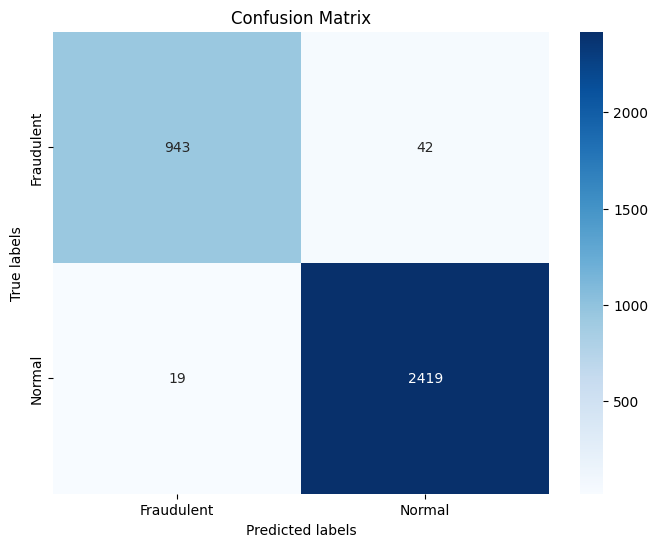

In [7]:
# LR

from sklearn.linear_model import LogisticRegression


# Logistic Regresyon modelini başlatın
lr_model = LogisticRegression(max_iter=10000)

# Logistic Regresyon modelini eğitin
lr_model.fit(X_train, y_train)

# Test seti üzerinde tahminler yapın
lr_predictions = lr_model.predict(X_test)

# Modeli değerlendirin

lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions, pos_label='Normal')
lr_recall = recall_score(y_test, lr_predictions, pos_label='Normal')
lr_f1_score = f1_score(y_test, lr_predictions, pos_label='Normal')

print("Logistic Regression Classifier:")
print(f"Accuracy: {lr_accuracy}")
print(f"Precision: {lr_precision}")
print(f"Recall: {lr_recall}")
print("F1 Score:", lr_f1_score)
# print("Sınıflandırma Raporu:")
# print(classification_report(y_test, lr_predictions))

# Compute confusion matrix
cm = confusion_matrix(y_test, lr_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=lr_model.classes_, yticklabels=lr_model.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Random Forest Classifier:
Accuracy: 0.9932807478819748
Precision: 0.9930583911800736
Recall: 0.9975389663658737
F1 Score: 0.995293636177614


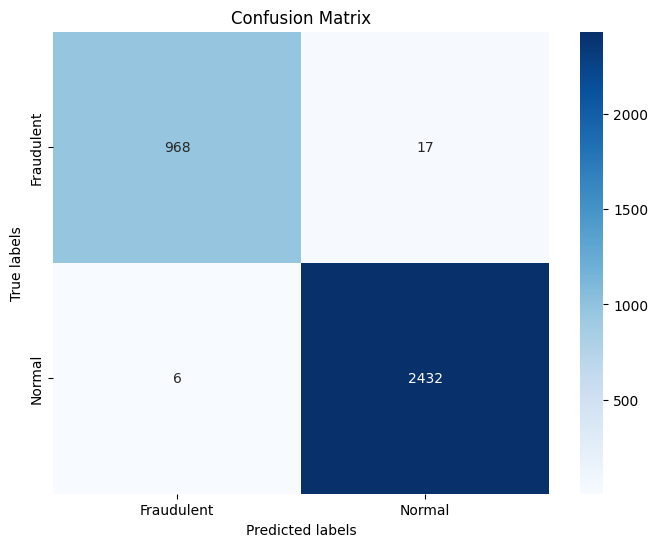

In [8]:
# RF

from sklearn.ensemble import RandomForestClassifier

# Rastgele Orman modelini başlatın
rf_model = RandomForestClassifier()

# Rastgele Orman modelini eğitin
rf_model.fit(X_train, y_train)

# Test seti üzerinde tahminler yapın
rf_predictions = rf_model.predict(X_test)

# Modeli değerlendirin
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, pos_label='Normal')
rf_recall = recall_score(y_test, rf_predictions, pos_label='Normal')
rf_f1_score = f1_score(y_test, rf_predictions, pos_label='Normal')


print("Random Forest Classifier:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print("F1 Score:", rf_f1_score)

# print("Sınıflandırma Raporu:")
# print(classification_report(y_test, rf_predictions))

# Compute confusion matrix
cm = confusion_matrix(y_test, rf_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Naive Bayes Classifier:
Accuracy: 0.9328074788197488
Precision: 0.9646464646464646
Recall: 0.9401148482362592
F1-score: 0.9522226838388035


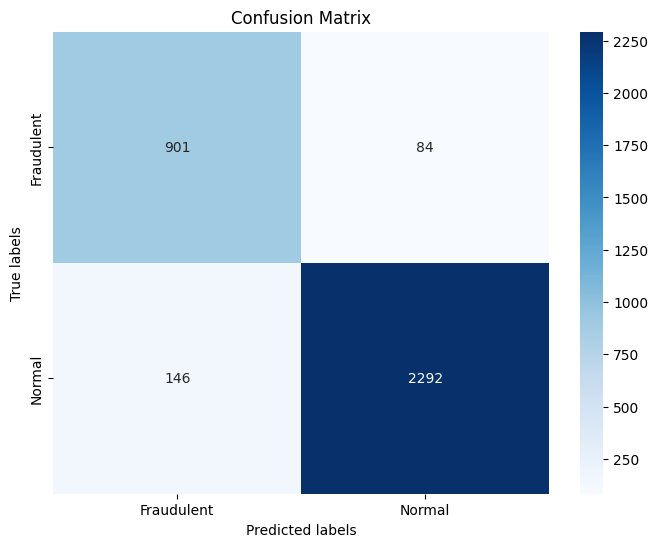

In [9]:
#NB

from sklearn.naive_bayes import MultinomialNB

# Çoklu Naive Bayes modelini başlatın
nb_model = MultinomialNB()

# Çoklu Naive Bayes modelini eğitin
nb_model.fit(X_train, y_train)

# Test seti üzerinde tahminler yapın
nb_predictions = nb_model.predict(X_test)

# Modeli değerlendirin
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions, pos_label='Normal')
nb_recall = recall_score(y_test, nb_predictions, pos_label='Normal')
nb_f1_score = f1_score(y_test, nb_predictions, pos_label='Normal')


print("Naive Bayes Classifier:")
print(f"Accuracy: {nb_accuracy}")
print(f"Precision: {nb_precision}")
print(f"Recall: {nb_recall}")
print(f"F1-score: {nb_f1_score}")
# print("Sınıflandırma Raporu:")
# print(classification_report(y_test, nb_predictions))

# Compute confusion matrix
cm = confusion_matrix(y_test, nb_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Support Vector Machine Classifier (LinearSVC):
Accuracy: 0.9924043236926673
Precision: 0.9938574938574939
Recall: 0.9954881050041017
f1_score: 0.9946721311475409


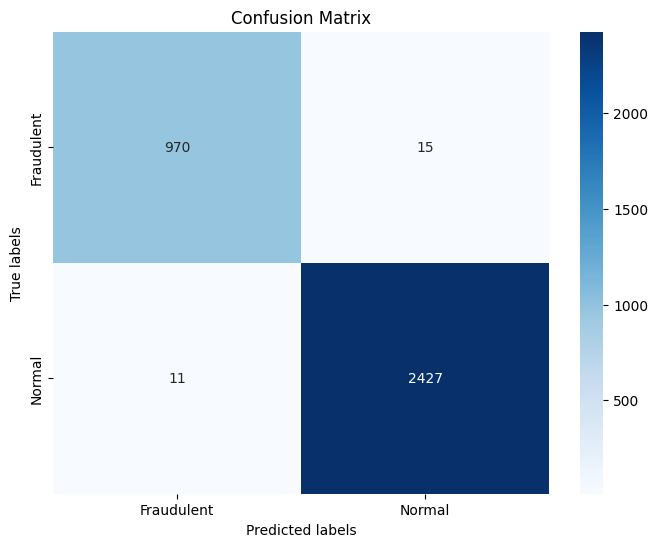

In [10]:
#SVM

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.model_selection import train_test_split

svm_model = LinearSVC(max_iter=10000000, random_state=42)

svm_model.fit(X_train, y_train)

svm_predictions = svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, pos_label='Normal')
svm_recall = recall_score(y_test, svm_predictions, pos_label='Normal')
svm_f1_score = f1_score(y_test, svm_predictions, pos_label='Normal')

print("Support Vector Machine Classifier (LinearSVC):")
print(f"Accuracy: {svm_accuracy}")
print(f"Precision: {svm_precision}")
print(f"Recall: {svm_recall}")
print(f"f1_score: {svm_f1_score}")

# print("Classification Report:")
# print(classification_report(y_test, svm_predictions))

cm = confusion_matrix(y_test, svm_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
